In [9]:
%%bash
pip install seaborn




Requirement already up-to-date: pip in /home/sumit/anaconda/lib/python3.5/site-packages


bash: line 3: fg: no job control


In [15]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn as sns
from scipy import stats

In [17]:

#Loading the dataset

train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv") 

# Removing the varibles with only one value
#del train['Utilities']
#del test['Utilities']

#train = train[train.Street != 'Pave']
#test = test[test.Street != 'Pave']



# Data Exploration

In [18]:
print(' No of rows and columns in train data are: {0} rows and {1} columns'.format(train.shape[0], train.shape[1]))

print(' No of rows and columns in test data are: {0} rows and {1} columns'.format(test.shape[0], test.shape[1]))


 No of rows and columns in train data are: 1460 rows and 81 columns
 No of rows and columns in test data are: 1459 rows and 80 columns


In [19]:
# Lets see the structure of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Checking for Missing values in the dataset:

In [20]:
# Checking columns with missing values
train.columns[train.isnull().any()]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [21]:
# Checking count of missing values
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

So, from a total of 81 attributes, 19 have missing values. 
Let us check the percentage of missing values in these attributes:

In [22]:
# Missing value counts
missing = train.isnull().sum()/len(train)
missing = missing[missing>0]
missing.sort_values(inplace = True)
missing

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

So, the variable with highest number of missing value is 'PoolQC' with 99.5% missing values followed by Miscfeature(96.3%), Alley(93.7%) and Fence(80.7%).



Lets check for the distribution of the response variable (SalePrice):
    

/home/sumit/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


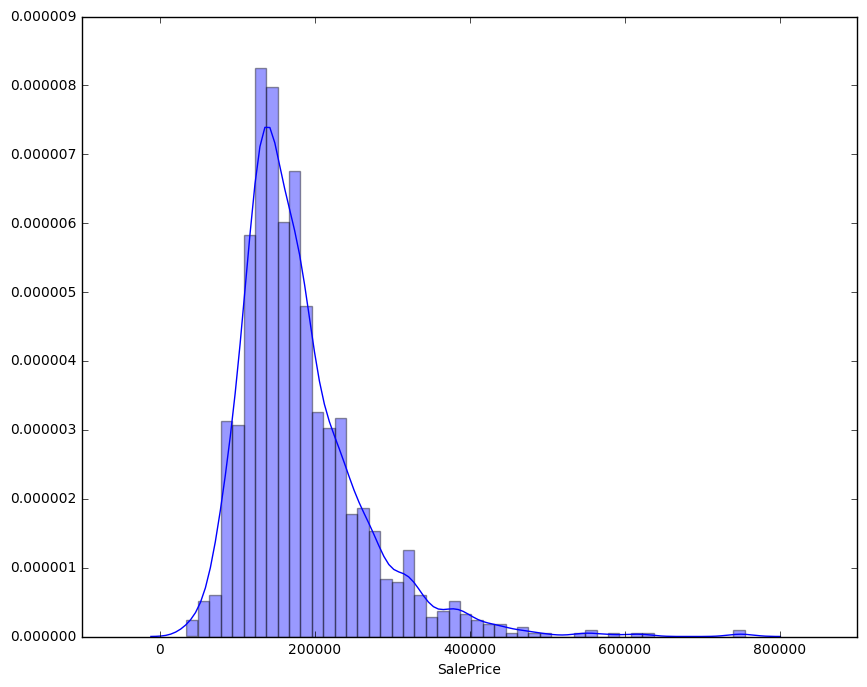

In [23]:
sns.distplot(train['SalePrice'])

Here, we observe that the target variable 'SalePrice' is slightly skewed to the right. Target variables which have normal distribution help isn better modeling relationship between the dependent and independent variables.
Hence we intend to transform the target variable. We can adopt log transformation to get rid of the skewness.


In [24]:
# Checking skewness alternatively:
train['SalePrice'].skew()

1.8828757597682129

Let us try to transform the target variable by applying log transformation:

In [25]:
# Log tranforming the target variable
target = np.log(train['SalePrice'])
target.skew()


0.12133506220520406

Thus, we observe that the skewness has considerably reduced. Now we plot and check the distribution of the transformed variable.


/home/sumit/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


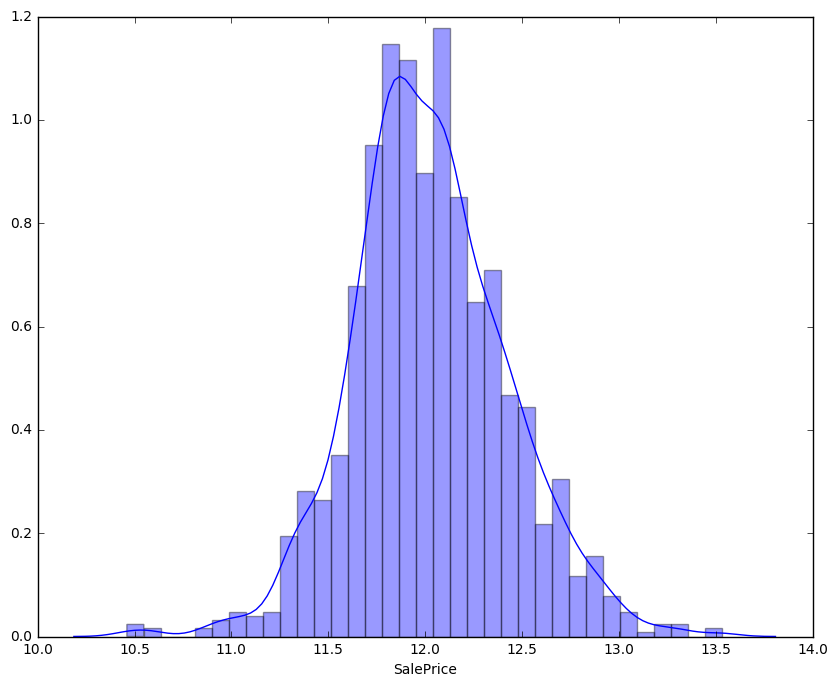

In [26]:
# Plotting the transformed variable 
sns.distplot(target)

Thus, we observe that log transformation has quite fixed the skewness to get a normal distribution.

Let us try to check the corrleation of the independent variables with the target variable. By this way, we can eliminate the variables which have a very low correlation with the target variable and thereby reduce the total number of variables to be considered for modeling.

Also, lets seperate the categorical variable from the numeric variable for effective visualization.

In [27]:
# seperating categorical and numeric variables
numeric_data = train.select_dtypes(include=[np.number])
cat_data = train.select_dtypes(exclude=[np.number])

print("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1], cat_data.shape[1]))


There are 38 numeric and 43 categorical columns in train data


We donot need the ID variable and so we can delete it.


In [28]:
del numeric_data['Id']

Now, since we have divided the dataset into categorical and numerical data points, we can now check for correlation in the numeric_data:

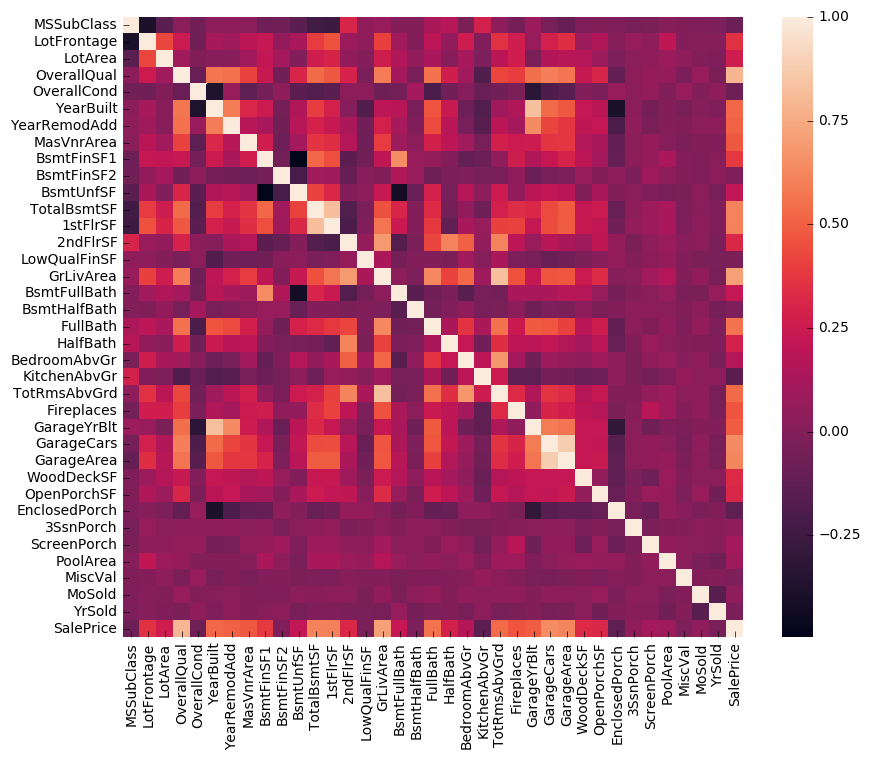

In [29]:
# Correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

The last row has 'SalePrice' which can be compared with correlations of other variables. 
Let us try to check the numeric correlation values of variables with 'SalePrice'

In [30]:
corr['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Let us visualize some of the highly correlated variables:

The variable 'Overallqual' is 79% correlated with the target variable. Next is GrLivArea which is 79% correlated. 
The high correlation of thest two variables makes practical sense as well.

Let us further try to visualize some of these highly corrlated variables:



In [31]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

This variable seems to be rated on a scale of 1-10 and therefore is an ordinal variable.
Lets further explore this variable by checking the median sale price of houses wrt OverallQual.(We use median since our target variable was found to be skewed which contains outliers and medians are robust to outliers.)

In [32]:
# Creating aggregated tables using Pandas pivot table
# Plotting median price per quality level
pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
pivot

OverallQual
1      50150
2      60000
3      86250
4     108000
5     133000
6     160000
7     200141
8     269750
9     345000
10    432390
Name: SalePrice, dtype: int64

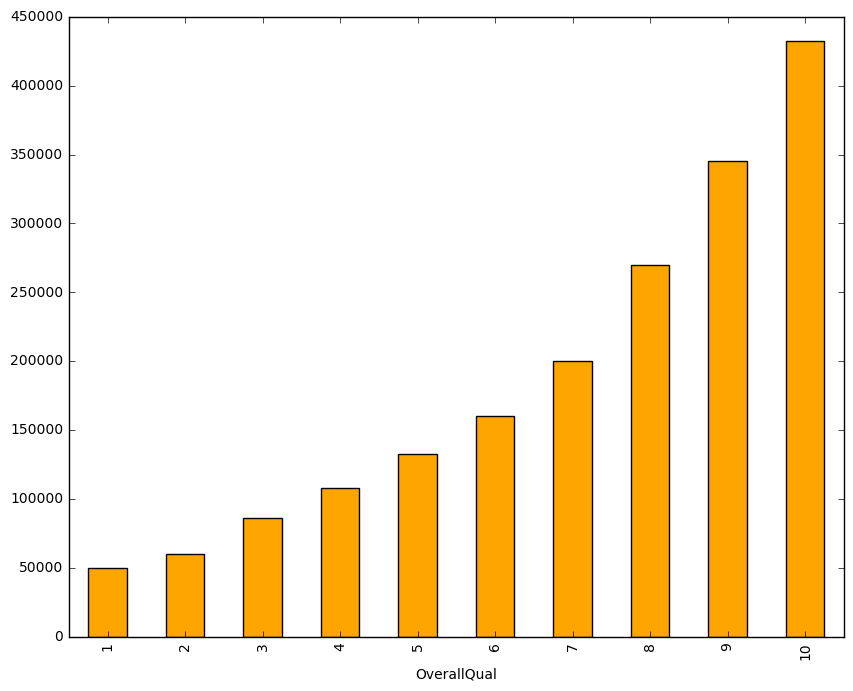

In [33]:
# Plotting the table to observe Median SalePrices
pivot.plot(kind='bar', color='orange')

Thus, understandably, we observe that as the Overall Quality increases, the Median Sale price also rises.

Lets visualize the next highly correlated variable GrLivArea:

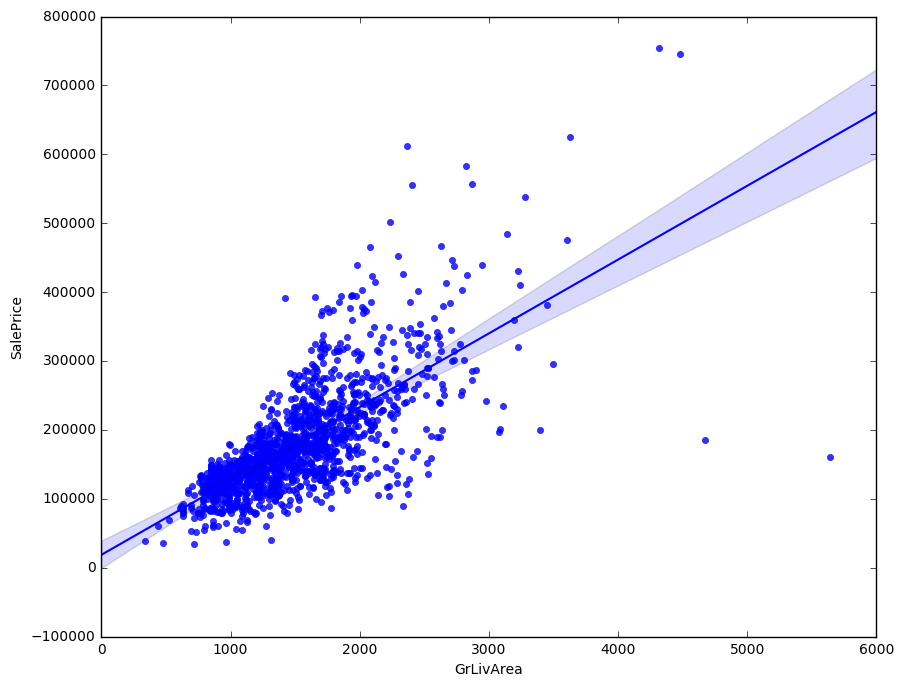

In [34]:
# Plotting GrLivArea
sns.regplot(x=train['GrLivArea'], y= train['SalePrice'])

Thus, we observe that Sale Price and GrLivArea have a direct correlation. 
An oulier can be observed at GrLivArea > 4000 and therefore needs to be eliminated as such ouliers lower a model's performance.

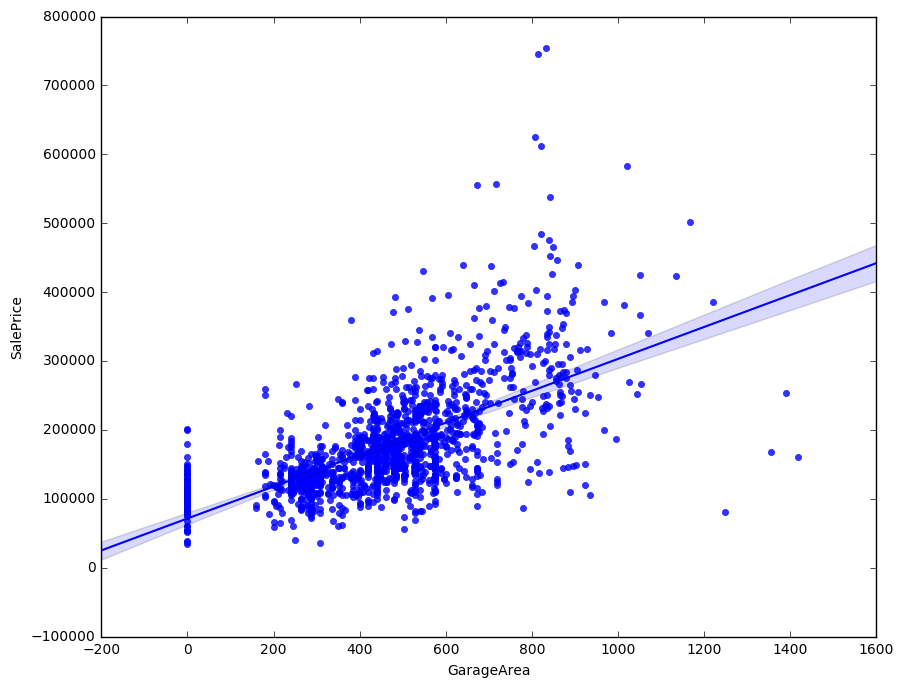

In [35]:
sns.regplot(x=train['GarageArea'], y=train['SalePrice'])

Similarly, for GarageArea also we can observe a direct correlation indicating higher the Garage Area higher is the Sale Price. 

Let us now visualize the categorical variables:

In [36]:
cat_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Let us check the median sale price of a house based on its Sale Condition:

In [37]:
sp_pivot = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
sp_pivot

SaleCondition
Abnorml    130000
AdjLand    104000
Alloca     148145
Family     140500
Normal     160000
Partial    244600
Name: SalePrice, dtype: int64

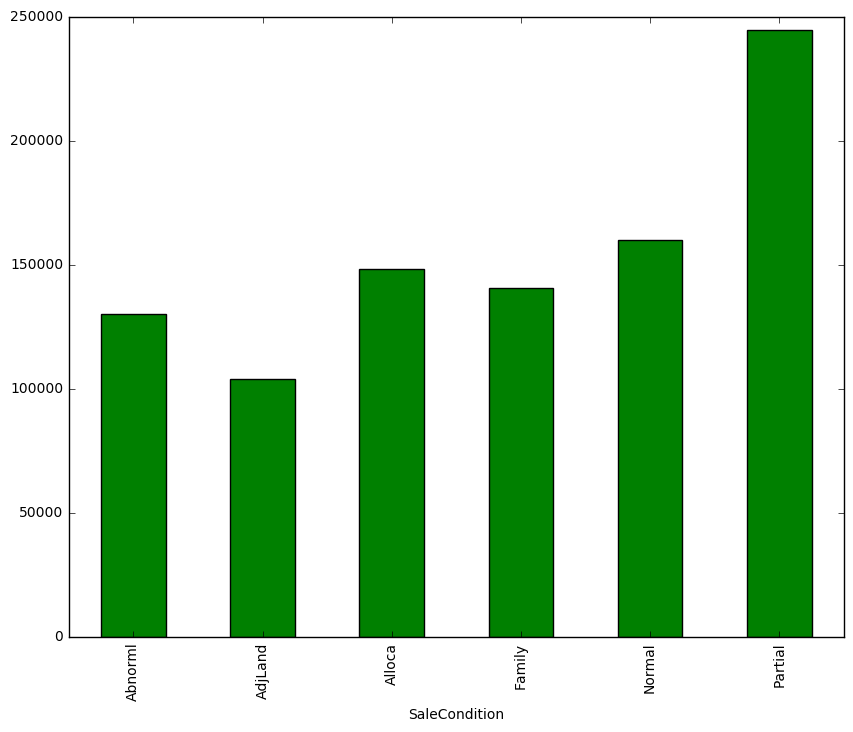

In [38]:
sp_pivot.plot(kind="bar", color="green")

We observe that Sale Condition 'Partial' fetches the highest Median Price.

Now, let us plot Histograms for the dependent variables and check for skewness


/home/sumit/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


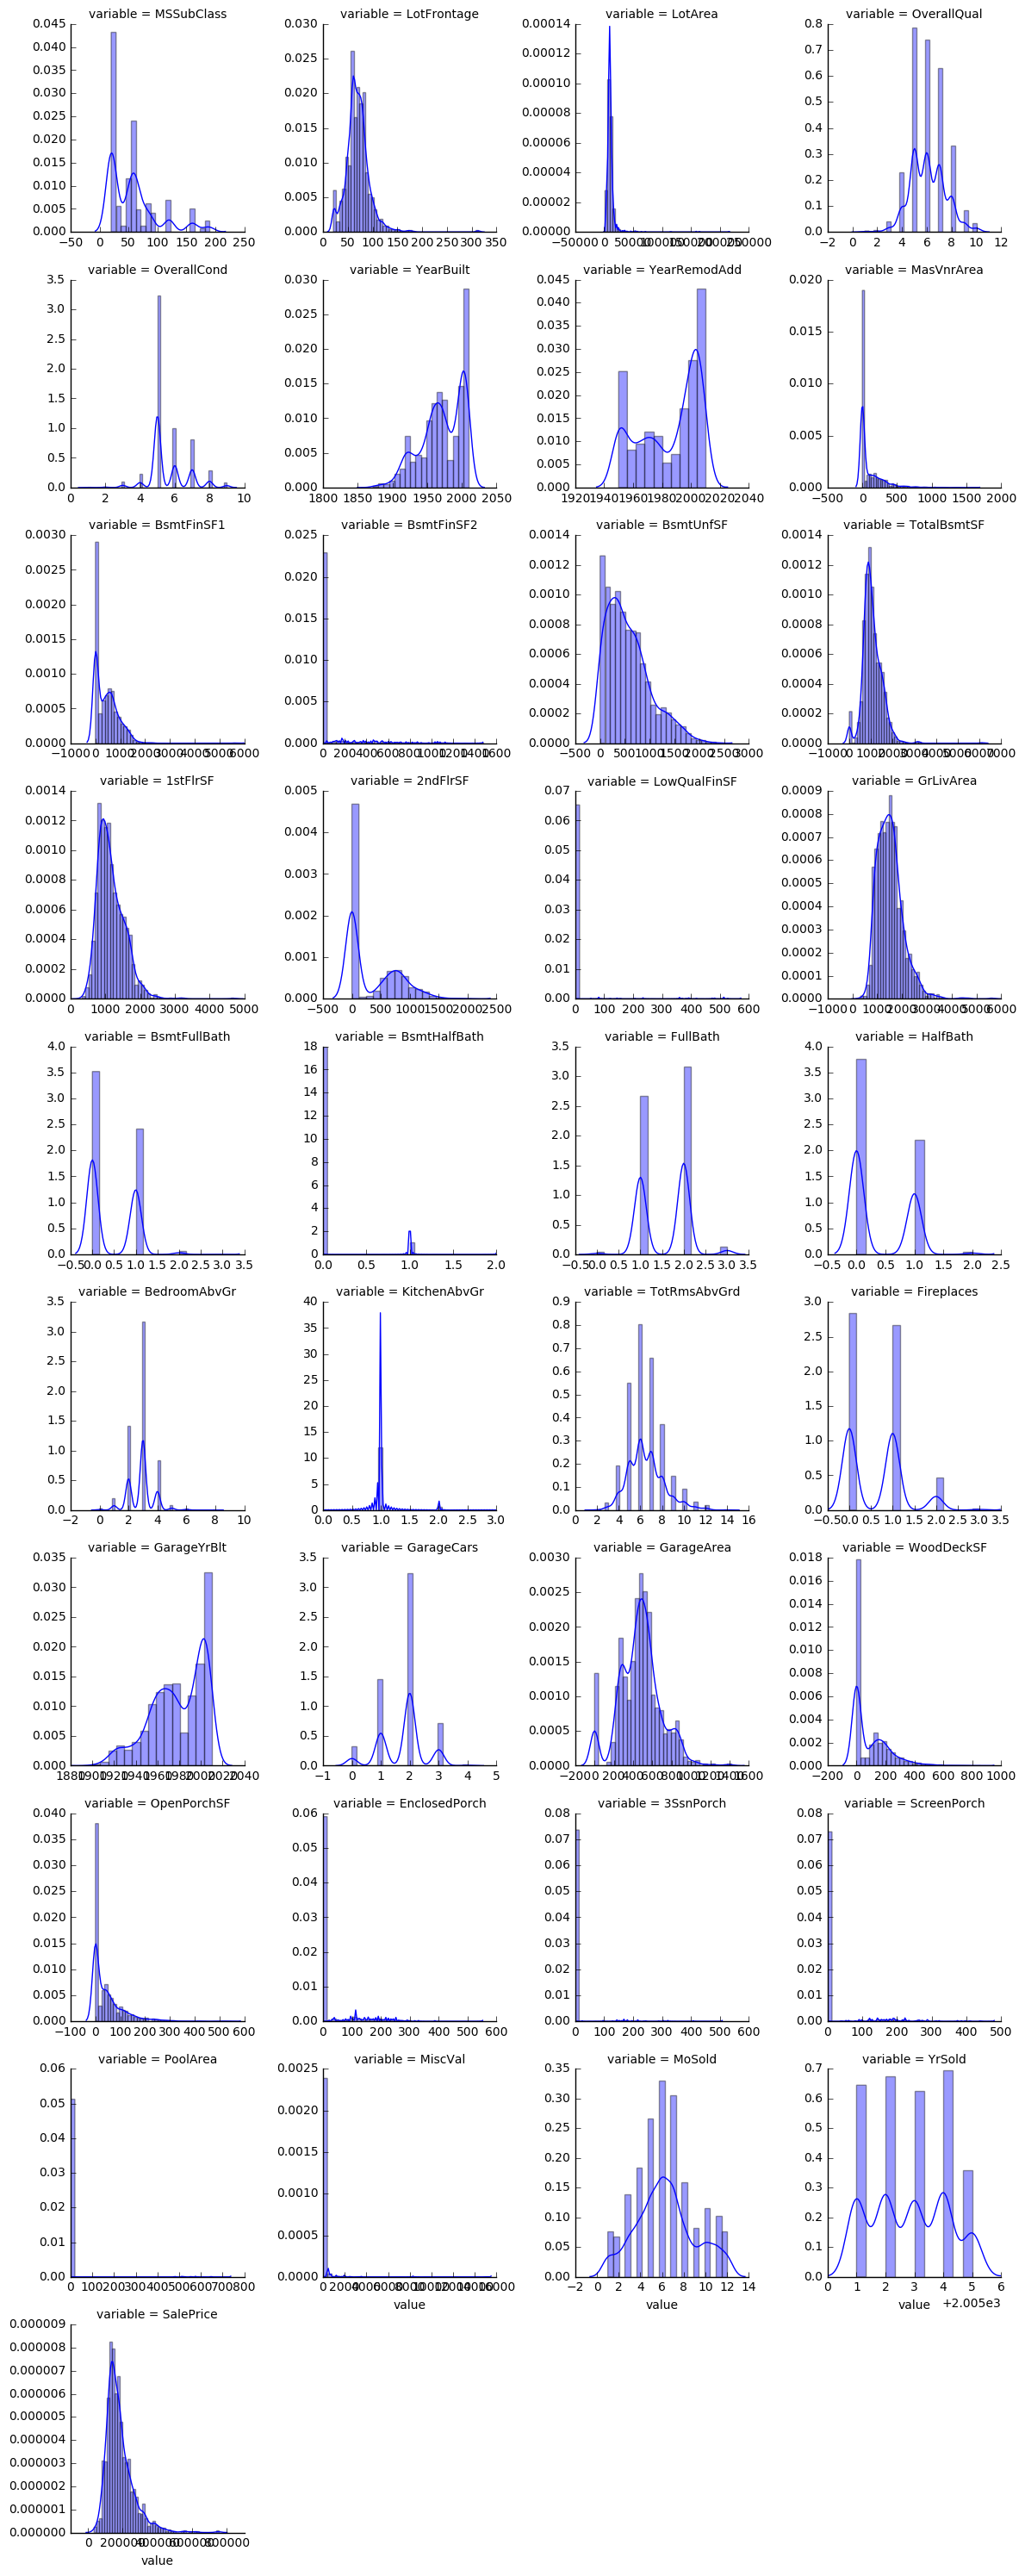

In [39]:
# Create numeric data histograms

num = [f for f in train.columns if train.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(train, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

As we can observe, most of the variables seem to be rightly skewed which we will transform later on. 
Nw let us plot box plots to chcvk for the distribution of catgeorical variables:

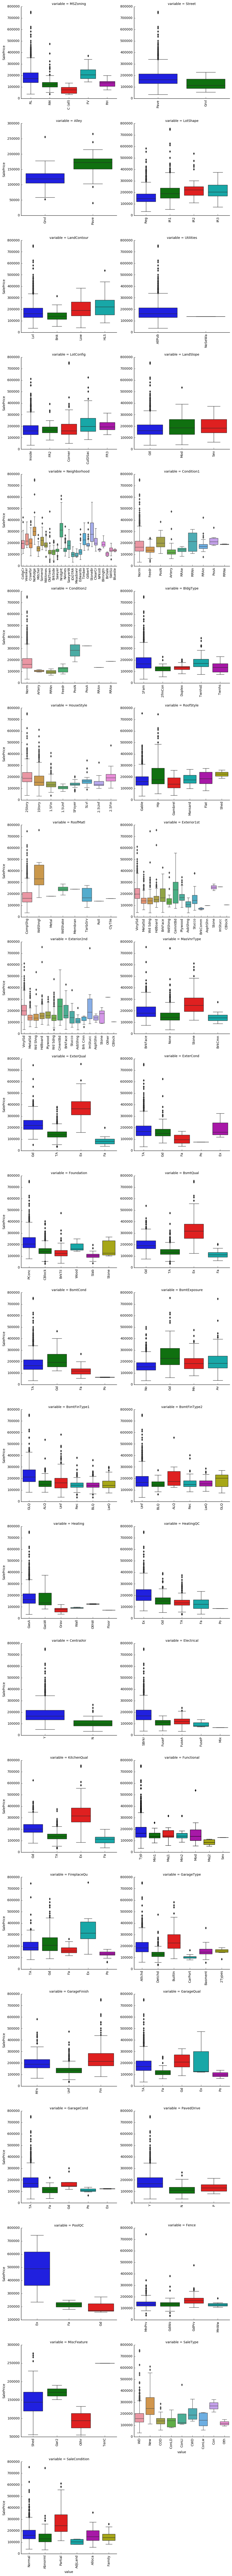

In [40]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in train.columns if train.dtypes[f] == 'object']

p = pd.melt(train, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

Here, we observe that most of the variables have outliers and it will be very inconvenient to get rid of them one by one.
Hence, we will leave them as it is and let the algorithm take care of it. Tree based algorithms are usually robust to outliers. 

# Data Pre-Processing

In this stage, we will handle outlier values, impute missing values, encode categorical variables to make the data consistent.

In [41]:
# Removing the outlier from GrLivArea found earlier

train.drop(train[train['GrLivArea']>4000].index, inplace = True)
train.shape

(1456, 81)

Row 666 in the test data has missing information for variables related to 'Garage'(GarageQual, GarageCond,GarageFinish, GarageYrBlt) 
Let us impute these values using the mode of these variables:

In [42]:
# imputing using mode
test.loc[666, 'GarageQual']="TA"
test.loc[666, "GarageCond"]="TA"
test.loc[666, "GarageFinish"]="Unf"
test.loc[666, "GarageYrBlt"]="1980"

In row 1116,in test data, all garage variables are NA except GarageType. Lets make it NA as well.

In [43]:
test.loc[1116,"GarageType"]=np.nan

Now, let us encode the categorical variables. 
LabelEncoder function from sklearn can be used to encode variables.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na= None):
    if fill_na is not None:
        data[var].fillna(fill_na, inplace = True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data





This function imputes blank levels with mode values.
    Let us now impute the missing values in LotFrontage variable by its median value of LotFrontage by neighborhood. To do this, we will combine our train and test set to modify both data sets at once.

In [45]:
# Combining train and test set
alldata = train.append(test)
alldata.shape


(2915, 81)

Now let us impute the LotFrontage variable

In [46]:
# imputing LotFrontage by median of Neighborhood
lot_fr_by_nhood = train['LotFrontage'].groupby(train['Neighborhood'])

for key, group in lot_fr_by_nhood:
    idx = (alldata['Neighborhood'] == key) & (alldata['LotFrontage'].isnull())
    alldata.loc[idx, 'LotFrontage'] = group.median()

Now, let us impute the missing values in other numeric variables by 0.

In [47]:
# Imputing missing values = 0
alldata['MasVnrArea'].fillna(0, inplace = True)
alldata["BsmtFinSF1"].fillna(0, inplace=True)
alldata["BsmtFinSF2"].fillna(0, inplace=True)
alldata["BsmtUnfSF"].fillna(0, inplace=True)
alldata["TotalBsmtSF"].fillna(0, inplace=True)
alldata["GarageArea"].fillna(0, inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

Now, let us convert the categorical variables into ordinal variables. To do this, we will simply create a dictionary of key-value pairs and map it to the variable in the data set.

In [48]:
qual_dict = {np.nan: 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])

for i in name:
     alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata["BsmtExposure"] = alldata["BsmtExposure"].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata["BsmtFinType1"] = alldata["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
alldata["BsmtFinType2"] = alldata["BsmtFinType2"].map(bsmt_fin_dict).astype(int)
alldata["Functional"] = alldata["Functional"].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

alldata["GarageFinish"] = alldata["GarageFinish"].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata["Fence"] = alldata["Fence"].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

#encoding data
alldata["CentralAir"] = (alldata["CentralAir"] == "Y") * 1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])

for x in varst:
         factorize(alldata, x)

#encode variables and impute missing values
alldata = factorize(alldata, "MSZoning", "RL")
alldata = factorize(alldata, "Exterior1st", "Other")
alldata = factorize(alldata, "Exterior2nd", "Other")
alldata = factorize(alldata, "MasVnrType", "None")
alldata = factorize(alldata, "SaleType", "Oth")

# Feature Engineering

Let us create some binary variables depicting the presence or absence of a category. The new feature will contain 0 or 1 values. Also we will create some more features which will be described in comments.

In [49]:
#creating new variable (1 or 0) based on irregular count levels
#The level with highest count is kept as 1 and rest as 0

alldata["IsRegularLotShape"] = (alldata["LotShape"] == "Reg")*1
alldata["IsLandLevel"] = (alldata["LandContour"] == "Lvl") * 1
alldata["IsLandSlopeGentle"] = (alldata["LandSlope"] == "Gtl") * 1
alldata["IsElectricalSBrkr"] = (alldata["Electrical"] == "SBrkr") * 1
alldata["IsGarageDetached"] = (alldata["GarageType"] == "Detchd") * 1
alldata["IsPavedDrive"] = (alldata["PavedDrive"] == "Y") * 1
alldata["HasShed"] = (alldata["MiscFeature"] == "Shed") * 1
alldata["Remodeled"] = (alldata["YearRemodAdd"] != alldata["YearBuilt"]) * 1

In [50]:
#Did the modeling happen during the sale year?
alldata["RecentRemodel"] = (alldata["YearRemodAdd"] == alldata["YrSold"]) * 1

# Was this house sold in the year it was built?
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [51]:
#setting levels with high count as 1 and the rest as 0
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})


In [52]:
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [53]:
# Checking dimensions
alldata.shape

(2915, 100)

So, now we have added 19 more columns to our initial 81 columns. 

We will again append the original train and test set to create a new alldata2 file containing original features. 
We will use this file as a reference to create additional features:

In [54]:
# create alldata2
alldata2 = train.append(test)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})



Just like Garage, we have several columns associated with the area of the property. An interesting variable could be the sum of all areas for a particular house. 
In addition, we can also create new features based on the year the house was built.

In [55]:
#calculating total area using all area columns
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]


alldata["TotalArea"] = alldata[area_cols].sum(axis =1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]
alldata["Age"] = 2010 - alldata["YearBuilt"]
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]


In [56]:
# Simplifications of existing features into bad/average/good based on counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})


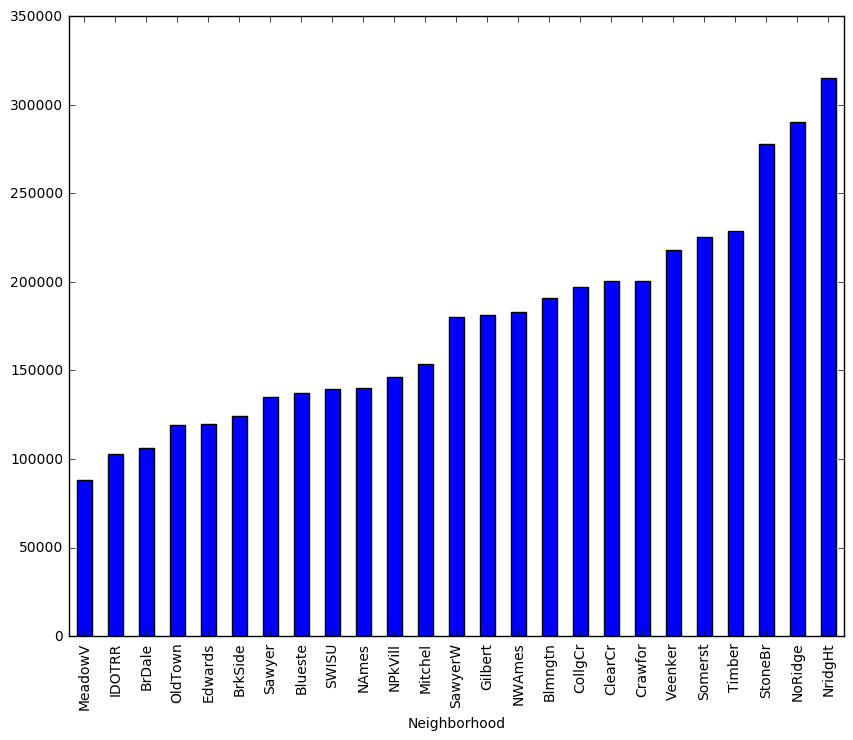

In [57]:
#grouping neighborhood variable based on this plot
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

The graph above gives us a good hint on how to combine levels of the neighborhood variable into fewer levels. 
We can combine bars of somewhat equal height in one category. To do this, we'll simply create a dictionary and map it with variable values.

In [58]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1, "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}

alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

# House completed before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})
alldata.shape

(2915, 126)

Thus, we have created 43 more variables. Let us split it into train and test set and create some more features.

In [59]:
# creating new data

train_new = alldata[alldata['SalePrice'].notnull()]

test_new  = alldata[alldata['SalePrice'].isnull()]

train_new.shape
test_new.shape

(1459, 126)

Now, we'll transform numeric features and remove their skewness.



In [60]:
#get numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype != object]

#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])
del test_new['SalePrice']

/home/sumit/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Now, let us standardize the numeric features


In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

for i, col in enumerate(numeric_features):
       train_new[col] = scaled[:,i]

numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
      test_new[col] = scaled[:,i]

/home/sumit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sumit/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now let us one hot encode the categorical variable, so that every level of a categorical variable results in a new variable with binary values ( 0 or 1): 

In [62]:
def onehot(onehot_df, df, column_name, fill_na):
       onehot_df[column_name] = df[column_name]
       if fill_na is not None:
            onehot_df[column_name].fillna(fill_na, inplace=True)

       dummies = pd.get_dummies(onehot_df[column_name], prefix="_"+column_name)
       onehot_df = onehot_df.join(dummies)
       onehot_df = onehot_df.drop([column_name], axis=1)
       return onehot_df

def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

#create one-hot features
onehot_df = munge_onehot(train)

neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

Let's add the one-hot variables in our train data set.

In [63]:
train_new = train_new.join(onehot_df)

In [64]:
print('The number of rows is {0} and {1} number of columns'.format(train_new.shape[0], train_new.shape[1]))



The number of rows is 1456 and 433 number of columns


Similarly, let us add one hot encoded data in test set as well:

In [105]:
test_new.drop('Alley', axis = 1)
#adding one hot features to test
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape


(1459, 407)

We osberve that the train set has more number of columns than the test set and so we will have to remove those variables and keep an equal number of columns in train and test data.

In [106]:
#dropping some columns from the train data as they are not found in test
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix", "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis = 1, inplace=True)
train_new.shape


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [72]:
#removing one column missing from train data
#test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Drop these columns
#drop_cols = ["_Condition2_PosN", # only two are not zero
         #"_MSZoning_C (all)",
         #"_MSSubClass_160"]

#train_new.drop(drop_cols, axis=1, inplace=True)
#test_new.drop(drop_cols, axis=1, inplace=True)

Let us transform the response variable and store it in a new array:

In [73]:
# Creating a label set
label_df = pd.DataFrame(index = train_new.index, columns=['SalePrice'])
label_df['SalePrice']= np.log(train['SalePrice'])
print("Train set size:", train_new.shape)
print("Test set size:", test_new.shape)

Train set size: (1456, 414)
Test set size: (1459, 125)


# Model Training and Evaluation

So, we are done with the Data Preprocessing part. Let us move onto training and evaluating the model.
We will use three algorithms: XGBoost which is a Gradient boosting technique along with Neural Netwok and Lasso regression.
Atlast, we will ensemble models to make final prediction:

In [74]:
from sklearn import preprocessing 
for f in train_new.columns: 
    if train_new[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(train_new[f].values)) 
        train_new[f] = lbl.transform(list(train_new[f].values))

for f in label_df.columns: 
    if label_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        lbl.fit(list(label_df[f].values)) 
        label_df[f] = lbl.transform(list(label_df[f].values))

# train.fillna((-999), inplace=True) 
# test.fillna((-999), inplace=True)

train_new=np.array(train_new) 
label_df=np.array(label_df) 
train_new = train_new.astype(float) 
label_df = label_df.astype(float)

In [75]:
# import os

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'

# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
import xgboost as xgb

regr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,max_depth=6,
                       min_child_weight = 1.5, n_estimators =7200, reg_alpha =0.9,
                       reg_lambda =0.6, subsample =0.2, seed = 42, silent=1)

regr.fit(train_new, label_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, learning_rate=0.05,
       max_delta_step=0, max_depth=6, min_child_weight=1.5, missing=None,
       n_estimators=7200, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1,
       seed=42, silent=1, subsample=0.2)

These parameters’ values are derived using cross-validation. To evaluate the model's performance, we'll create a quick RMSE function.

In [76]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
y_pred = regr.predict(train_new)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))


### make prediction on test set
# y_pred_xgb = regr.predict(test_new_one)




XGBoost score on training set:  0.0309442408409


Now let us train our model for Lasso regression

In [120]:
from sklearn.linear_model import Lasso

# Used Cross Validation to get the best value of alpha 
best_alpha = 0.00099
regr2 = Lasso(alpha = best_alpha, max_iter = 50000)
regr2.fit(train_new, label_df)

# running prediction on training set 
y_pred = regr2.predict(train_new)
print("Lasso score on training set: ", rmse(y_test, y_pred))




Lasso score on training set:  0.00121309734539


In [112]:
del test_new['Alley']

# test_new = test_new.drop('AllPub', 1)


Looks, like Lasso performs better than xgboost since its score is lower. 

 Since the data set is high dimensional (means large number of features), let us build a neural network model as well. We'll use the keras library to train the neural network.

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(10)

# create Model
# define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=398, init='normal', activation='relu'))
     model.add(Dense(10, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

# train_new = train_new.astype(np.float)
# test_new = test_new.astype(np.float)

seed = 10
np.random.seed(seed)

scale = StandardScaler()
X_train = scale.fit_transform(train_new)


X_test = scale.fit_transform(test_new)






We get an RMSE of 1.353 for the neural network model whioch is bad than the previous 2 models. 

For further improvement, let's try to ensemble the predictions from XGBoost and lasso model. We'll simply average the predictions.

In [121]:
#simple average
y_pred = (0.0309442408409 + 0.00121309734539) / 2
y_pred


0.016078669093145

This is our best score so far. It is observed that often ensemble learning techniques are better than a single model.